# Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.regularizers import l2, l1
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Load and preprocess data

In [2]:
data = pd.read_excel("HW2.xlsx",header=0)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [3]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X776,X777,X778,X779,X780,X781,X782,X783,X784,Y
count,2499.0,2499.0,2499.0,2499.0,2499.0,2499.0,2499.0,2499.0,2499.0,2499.0,...,2499.000000,2499.000000,2499.000000,2499.000000,2499.0,2499.0,2499.0,2499.0,2499.0,2499.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106843,0.061625,0.101240,0.073229,0.0,0.0,0.0,0.0,0.0,4.501801
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.817728,2.868935,3.953462,2.702459,0.0,0.0,0.0,0.0,0.0,2.872019
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.000000,143.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0,9.000000


In [4]:
# Shuffle the dataset
X, y = shuffle(X, y, random_state=42)
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Training set (first 2000 samples)
X_train = X[:2000]
y_train = y[:2000]

# Test set (last 500 samples)
X_test = X[-500:]
y_test = y[-500:]


# Part 1: Different subset sizes with fixed model

In [6]:
subset_sizes = [62, 125, 250, 500, 1000, 2000]
num_features = X.shape[1]
num_classes = len(np.unique(y))
num_runs = 5

In [7]:
avg_accuracies = []

for size  in subset_sizes:
    accuracies = []
    for run in range(num_runs):
        X_train_subset = X_train[:size]
        y_train_subset = y_train[:size]

        model = Sequential()
        model.add(Dense(20, activation="relu"))

        model.add(Flatten()) # Flatten layer        
        model.add(Dense(10, activation="softmax"))

        # model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train_subset, y_train_subset, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=0)

        y_pred = np.argmax(model.predict(X_test), axis=-1)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    avg_accuracies.append(avg_accuracy)
    print(f"Subset size: {size}, Average Validation Accuracy: {avg_accuracy:.4f}")

2023-05-05 19:48:44.351420: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 0s 340us/step
Subset size: 62, Average Validation Accuracy: 0.4380
16/16 [==============================] - 0s 359us/step
Subset size: 125, Average Validation Accuracy: 0.5916
16/16 [==============================] - 0s 327us/step
Subset size: 250, Average Validation Accuracy: 0.7320
16/16 [==============================] - 0s 342us/step
Subset size: 500, Average Validation Accuracy: 0.8144
16/16 [==============================] - 0s 354us/step
Subset size: 1000, Average Validation Accuracy: 0.8524
16/16 [==============================] - 0s 334us/step
Subset size: 2000, Average Validation Accuracy: 0.8852


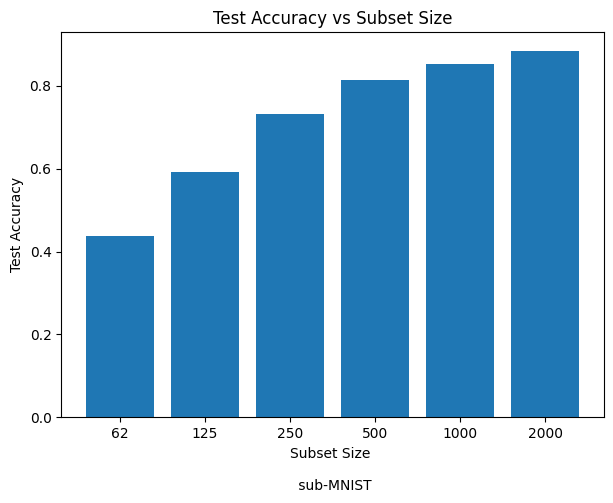

In [8]:
# Plot the average accuracies
labels = ['62', '125', '250', '500', '1000', '2000']

plt.figure(figsize=(7, 5))
plt.bar(labels, avg_accuracies)
plt.xlabel("Subset Size \n\n sub-MNIST")
plt.ylabel("Test Accuracy")
plt.title(f"Test Accuracy vs Subset Size")
plt.show()

# Part 2: Different subset sizes with different neuron numbers

In [9]:
# Define neuron list
neurons = [160, 80, 40, 20, 10, 5]

In [10]:
avg_accuracies = []
# Define model
for size, number_neuron in zip(subset_sizes, neurons):
    accuracies = []
    for run in range(num_runs):
        X_train_subset = X_train[:size]
        y_train_subset = y_train[:size]

        model = Sequential()
        model.add(Dense(number_neuron, activation="relu"))
        model.add(Flatten()) # Flatten layer
        model.add(Dense(10, activation="softmax"))

        model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train_subset, y_train_subset, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=0)

        y_pred = np.argmax(model.predict(X_test), axis=-1)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    avg_accuracies.append(avg_accuracy)
    print(f"Subset size: {size}, Number of neurons: {number_neuron}, Average Validation Accuracy: {avg_accuracy:.4f}")


16/16 [==============================] - 0s 429us/step
Subset size: 62, Number of neurons: 160, Average Validation Accuracy: 0.5756
16/16 [==============================] - 0s 402us/step
Subset size: 125, Number of neurons: 80, Average Validation Accuracy: 0.6820
16/16 [==============================] - 0s 397us/step
Subset size: 250, Number of neurons: 40, Average Validation Accuracy: 0.7812
16/16 [==============================] - 0s 324us/step
Subset size: 500, Number of neurons: 20, Average Validation Accuracy: 0.7908
16/16 [==============================] - 0s 345us/step
Subset size: 1000, Number of neurons: 10, Average Validation Accuracy: 0.8224
16/16 [==============================] - 0s 330us/step
Subset size: 2000, Number of neurons: 5, Average Validation Accuracy: 0.7560


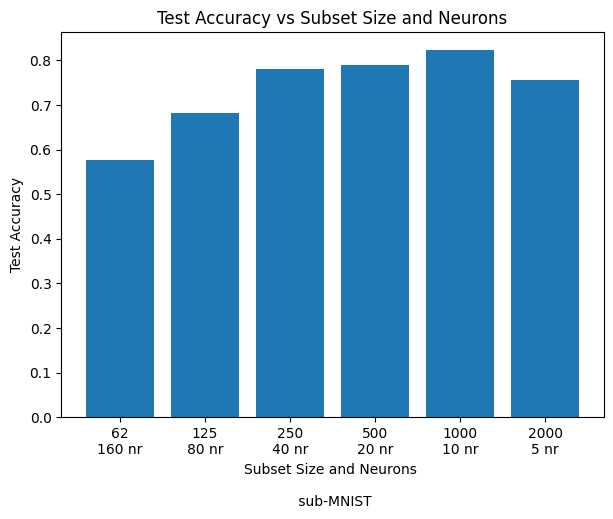

In [11]:
# Plot the average accuracies
plt.figure(figsize=(7, 5))
labels = [f"{size}\n{neuron} nr" for size, neuron in zip(subset_sizes, neurons)]
plt.bar(labels, avg_accuracies)
plt.xlabel("Subset Size and Neurons \n\n sub-MNIST")
plt.ylabel("Test Accuracy")
plt.title(f"Test Accuracy vs Subset Size and Neurons")
plt.show()

# Part 3: Fixed dataset vs. different numbers of layers

In [12]:
test_accuracy_list = []
# Define the models
def create_model_1(input_shape=(num_features, 1)):
    model = Sequential([
        Dense(20, activation='relu'),

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_2(input_shape=(num_features, 1)):
    model = Sequential([
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_3(input_shape=(num_features, 1)):
    model = Sequential([
        Dense(5, activation='relu'),
        Dense(5, activation='relu'),
        Dense(5, activation='relu'),
        Dense(5, activation='relu'),
        
        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

models = [create_model_1(), create_model_2(), create_model_3()]

# Train and evaluate each model
history_list = []

for model in models:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), verbose=0)
    # Evaluate the model on the test set
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracy_list.append(test_acc)


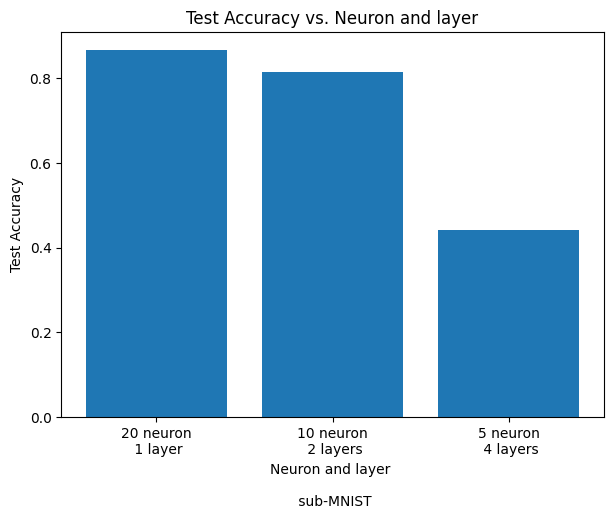

In [13]:
# Plot the average accuracies
labels = ['20 neuron\n 1 layer','10 neuron\n 2 layers','5 neuron\n 4 layers']
plt.figure(figsize=(7, 5))
plt.bar(labels, test_accuracy_list)
plt.xlabel("Neuron and layer \n\n sub-MNIST")
plt.ylabel("Test Accuracy")
plt.title(f"Test Accuracy vs. Neuron and layer")
plt.show()

# Part 4: Fixed dataset vs. different regularizers

In [14]:
test_accuracy_list = []
# Define the models
def create_model_0(input_shape=(num_features, 1)):
    model = Sequential([
        Dense(20, activation='relu'), # No regularizer
        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_1(input_shape=(num_features, 1)):
    model = Sequential([
        Dense(20, activation='relu',kernel_regularizer=l1(0.001)), # L1 regularizer with strength = 0.001

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_2(input_shape=(num_features, 1)):
    model = Sequential([
        Dense(20, activation='relu',kernel_regularizer=l2(0.001)), # L2 regularizer with strength = 0.001

        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_3(input_shape=(num_features, 1)):
    model = Sequential([
        Dense(20, activation='relu'), # Dropout layer with 0.5 ratio
        Dropout(0.5),
        
        Flatten(),
        Dense(10, activation='softmax')
    ])
    return model

models = [create_model_0(), create_model_1(), create_model_2(), create_model_3()]

# Train and evaluate each model
history_list = []

for model in models:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), verbose=0)
    # Evaluate the model on the test set
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracy_list.append(test_acc)

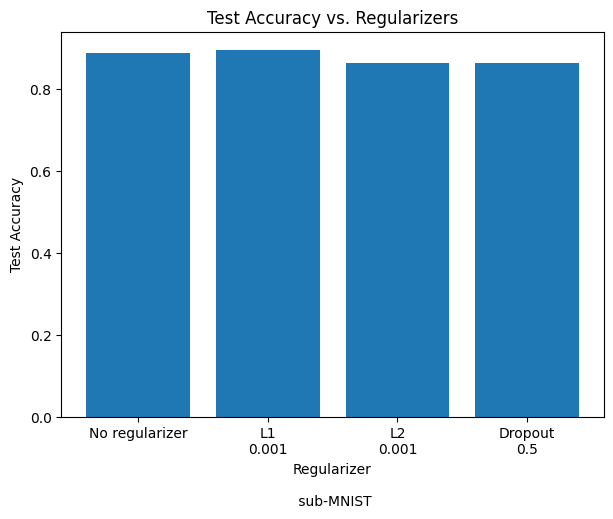

In [15]:
# Plot the average accuracies
labels = ['No regularizer','L1\n0.001','L2\n0.001','Dropout\n0.5']

# Plot the test accuracy values as a bar chart
plt.figure(figsize=(7, 5))
plt.bar(labels, test_accuracy_list)

# Add axis labels and a title
plt.xlabel("Regularizer\n \n sub-MNIST")
plt.ylabel("Test Accuracy")
plt.title(f"Test Accuracy vs. Regularizers")

# Display the plot
plt.show()